<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read .tsv data using pd.read_csv
# Setting sep='\t'
ds = pd.read_csv('Data/PS2/earthquakes-2021-10-13_19-04-37_+0800.tsv',sep='\t',encoding='utf-8',)

1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths

In [3]:
country_group = ds.groupby(by='Country').sum()
country_group.sort_values(by='Deaths',na_position='last',ascending=False)['Deaths']

Country
CHINA                               2074900.0
TURKEY                              1074769.0
IRAN                                1011437.0
SYRIA                                439224.0
ITALY                                434863.0
                                      ...    
PALAU                                     0.0
SAINT VINCENT AND THE GRENADINES          0.0
SAMOA                                     0.0
SAUDI ARABIA                              0.0
ZAMBIA                                    0.0
Name: Deaths, Length: 156, dtype: float64

In [4]:
1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

Object `not` not found.


In [ ]:
1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not

In [5]:
Earthquake_Year=pd.DataFrame({'Year':ds[ds.Mag>6].Year,'Count':np.ones(len(ds[ds.Mag>6]))})
Earthquake_Year.head()

,Year,Count
1,-2150.0,1.0
3,-2000.0,1.0
8,-1250.0,1.0
9,-1050.0,1.0
15,-479.0,1.0


In [6]:
Earthquakes_group = Earthquake_Year.groupby(by='Year').sum()
Earthquakes_group

,Count
Year,
-2150.0,1.0
-2000.0,1.0
-1250.0,1.0
-1050.0,1.0
-479.0,1.0
...,...
2017.0,32.0
2018.0,27.0
2019.0,27.0


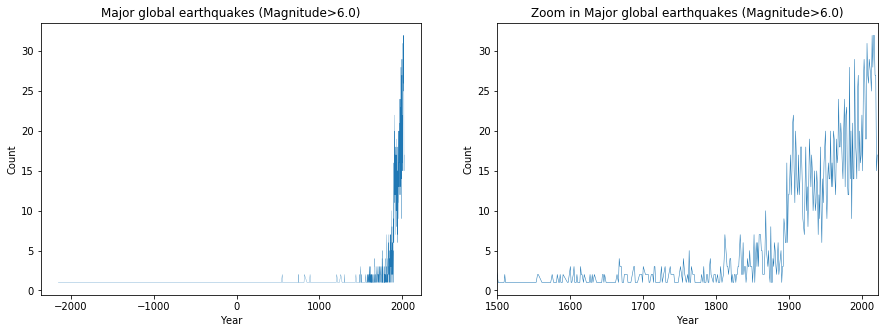

In [7]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(Earthquakes_group,lw=0.25)
ax[0].set_title('Major global earthquakes (Magnitude>6.0)')
ax[1].plot(Earthquakes_group,lw=0.5)
ax[1].set_xlim(1500,2022)
ax[1].set_title('Zoom in Major global earthquakes (Magnitude>6.0)')
for a in ax:
    a.set_xlabel('Year')
    a.set_ylabel('Count')

1.3 [10 points] Write a function CountEq_LargestEq that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [8]:
def CountEq_LargestEq():
    #country=input('Country Name (capitalize): ')
    data=pd.DataFrame({'Year':ds.Year,
              'Mo':ds.Mo,
              'Dy':ds.Dy,
              'Hr':ds.Hr,
              'Mn':ds.Mn,
              'Sec':ds.Sec,
              'Mag':ds.Mag,
              'Country':ds.Country,
              'Count':np.ones(len(ds))})
    global data_max 
    data_max = data.groupby(by='Country').max()
    global data_count 
    data_count = data.groupby(by='Country').sum()['Count']
    ds_out=pd.merge(data_max.iloc[:,0:4],pd.DataFrame({'sum':data_count}),right_index=True,left_index=True)
    return ds_out

In [9]:
All_country=CountEq_LargestEq()

In [10]:
All_country.sort_values(by='Year',na_position='last',ascending=False)

,Year,Mo,Dy,Hr,sum
Country,,,,,
HAITI,2021.0,12.0,29.0,21.0,17.0
PAKISTAN,2021.0,12.0,30.0,23.0,53.0
PERU,2021.0,12.0,31.0,23.0,185.0
PHILIPPINES,2021.0,12.0,31.0,23.0,221.0
CHINA,2021.0,12.0,31.0,23.0,610.0
...,...,...,...,...,...
NORWAY,1819.0,8.0,31.0,NaN,1.0
CANARY ISLANDS,1810.0,3.0,20.0,NaN,2.0
SIERRA LEONE,1795.0,5.0,20.0,22.0,1.0
